<a href="https://colab.research.google.com/github/bhuvana-ak/uplimit-synthetic_data_gen/blob/main/Project_2_Generating_Data_For_Preference_Tuning_Bhuvana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Generating Data For Preference Tuning

This guides builds upon the week 1 notebooks for [getting started](https://colab.research.google.com/drive/1oyFm3hftLneEQlUK19SELlkvUguCFrw_?usp=sharing) and [the project](https://colab.research.google.com/drive/1mje_YUaKGFpgmrACwpFLCyqWuIMN76Pe?usp=sharing). Feel free to take a look at those notebooks to freshen up your knowledge.

First, install the required dependencies.

In [2]:
!pip install "distilabel[hf-inference-endpoints]" "huggingface-hub" "textdescriptives" "gliclass" -U -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.3/254.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88

In [1]:
!pip install pandas==2.2.2


In [3]:
!pip install numpy==1.26.4

In [4]:
pip install --force-reinstall spacy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.6/442.6 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Next, we can log in to the Hugging Face Hub and configure our token through the login method.

In [1]:
! pip install --upgrade distilabel


In [ ]:
from huggingface_hub import login

login()

In [2]:
from huggingface_hub import login
from google.colab import userdata

login(token=(userdata.get('hf_token')))

In [3]:
from google.colab import userdata

open_ai_key = (userdata.get('open_ai'))

In [4]:
# List of questions related to ML, Data Science, Science, Geography, and Software Design
instruction_dataset = [
    # Machine Learning (ML)
    "What is the difference between supervised learning and unsupervised learning?",
    "Explain the concept of overfitting in machine learning and how it can be avoided.",
    "What is a confusion matrix, and why is it used in classification problems?",
    "What is the purpose of a loss function in machine learning models?",
    "How does gradient descent work in training machine learning models?",

    # Data Science
    "What is the difference between structured and unstructured data?",
    "Explain the concept of data wrangling and why it is important in data analysis.",
    "What are the key differences between correlation and causation?",
    "What is the purpose of feature engineering in building predictive models?",
    "How do you handle missing data in a dataset?",

    # Science
    "What are Newton's three laws of motion, and how do they apply to everyday life?",
    "Explain the process of photosynthesis and its importance to life on Earth.",
    "What is the difference between potential energy and kinetic energy?",
    "How does the water cycle work, and what are its main stages?",
    "What is the role of DNA in living organisms?",

    # Geography
    "What are the three layers of Earth, and what are their characteristics?",
    "Name the seven continents of the world and one unique feature of each.",
    "What is the difference between weather and climate?",
    "How do tectonic plates cause earthquakes and volcanic eruptions?",
    "What are the major types of biomes, and how do they differ from one another?",

    # Software Design
    "What is the difference between functional programming and object-oriented programming?",
    "Explain the concept of design patterns with an example.",
    "What is modularity in software design, and why is it important?",
    "How does version control (e.g., Git) help in collaborative software development?",
    "What are the key principles of Agile software development?"
]

# Print all questions to verify
for idx, question in enumerate(instruction_dataset, start=1):
    print(f"{idx}. {question}")

1. What is the difference between supervised learning and unsupervised learning?
2. Explain the concept of overfitting in machine learning and how it can be avoided.
3. What is a confusion matrix, and why is it used in classification problems?
4. What is the purpose of a loss function in machine learning models?
5. How does gradient descent work in training machine learning models?
6. What is the difference between structured and unstructured data?
7. Explain the concept of data wrangling and why it is important in data analysis.
8. What are the key differences between correlation and causation?
9. What is the purpose of feature engineering in building predictive models?
10. How do you handle missing data in a dataset?
11. What are Newton's three laws of motion, and how do they apply to everyday life?
12. Explain the process of photosynthesis and its importance to life on Earth.
13. What is the difference between potential energy and kinetic energy?
14. How does the water cycle work, a

## 1. Generate a dataset for preference tuning

### Basic dataset

We can generate data with two different model sizes where we assume the bigger one results in better results.

In [ ]:
# from distilabel.models.llms.huggingface import InferenceEndpointsLLM
# from distilabel.pipeline import Pipeline
# from distilabel.steps import LoadDataFromDicts
# from distilabel.steps.tasks import TextGeneration

# with Pipeline() as pipeline:
#     data = LoadDataFromDicts(
#         data=[{"instruction": "Generate a short question about Machine Learning."}]
#     )
#     llm_worse = InferenceEndpointsLLM(
#         base_url="https://api-inference.huggingface.co/models/Qwen/Qwen2.5-1.5B-Instruct"
#     )
#     llm_better = InferenceEndpointsLLM(
#         base_url="https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-3B-Instruct"
#     )
#     gen_a = TextGeneration(llm=llm_worse, output_mappings={"generation": "instruction"})
#     gen_b = TextGeneration(llm=llm_better, output_mappings={"generation": "rejected"})
#     gen_c = TextGeneration(llm=llm_better, output_mappings={"generation": "chosen"})
#     data >> gen_a >> gen_b >> gen_c

# if __name__ == "__main__":
#     username = "bhuvana-ak7"
#     distiset = pipeline.run(use_cache=False)
#     distiset.push_to_hub(f"{username}/uplimit-synthetic-data-week-2-basic")

In [5]:
print("Generating preference pairs using Distilabel")
base_url = "https://api-inference.huggingface.co/models"
meta_model = "Llama-3.3-70B-Instruct"#"Llama-3.2-3B-Instruct"
mistral_model = "Mistral-7B-Instruct-v0.2"
qwen_model = "Qwen2.5-1.5B-Instruct"
qwen_url = f"{base_url}/Qwen/{qwen_model}"
llama_url = f"{base_url}/meta-llama/{meta_model}"
mistral_url = f"{base_url}/mistralai/{mistral_model}"
# Generate input data
input_data = [{"instruction": instruction} for instruction in instruction_dataset]
print(f"Number of input data:",{len(input_data)})
print(input_data[:3])


Generating preference pairs using Distilabel
Number of input data: {25}
[{'instruction': 'What is the difference between supervised learning and unsupervised learning?'}, {'instruction': 'Explain the concept of overfitting in machine learning and how it can be avoided.'}, {'instruction': 'What is a confusion matrix, and why is it used in classification problems?'}]


In [6]:
from distilabel.models.llms.huggingface import InferenceEndpointsLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import GroupColumns,LoadDataFromDicts
from distilabel.steps.tasks import TextGeneration

#Distilabel pipeline
with Pipeline(cache_dir="/home/cache/distilabel") as pipeline:
  data = LoadDataFromDicts(data=input_data)
  print(f"data {data}")
  # Use different models a and b for responses with different quality
  llm_a = InferenceEndpointsLLM(
                base_url=llama_url, #Llama-3.3-70B-Instruct

            )
  llm_b = InferenceEndpointsLLM(
                base_url=mistral_url, #Mistral-7B-Instruct-v0.2
            )
  gen_a = TextGeneration(
                llm=llm_a,
                output_mappings={"generation": "Response_A"},
            )


  gen_b = TextGeneration(
                llm=llm_b,
                output_mappings={"generation": "Response_B"},
            )

  # group = GroupColumns(columns=["Response_A", "Response_B"])


  #data >> [gen_b,gen_a] >> group
  data >> gen_b >> gen_a
  # Run the pipeline
  distiset = pipeline.run()


    # gen_a = TextGeneration(llm=llm_worse, output_mappings={"generation": "instruction"})
    # gen_b = TextGeneration(llm=llm_better, output_mappings={"generation": "rejected"})
    # gen_c = TextGeneration(llm=llm_better, output_mappings={"generation": "chosen"})
    # data >> gen_a >> gen_b >> gen_c

data exclude_from_signature={'llm_jobs_ids', 'gpu_memory_utilization', 'disable_cuda_device_placement', 'exclude_from_signature', 'resources', 'llm_offline_batch_generation_block_until_done', 'input_batch_size', 'type_info'} name='load_data_from_dicts_0' resources=StepResources(replicas=1, cpus=None, gpus=None, memory=None, resources=None) input_mappings={} output_mappings={} use_cache=True batch_size=50 data=[{'instruction': 'What is the difference between supervised learning and unsupervised learning?'}, {'instruction': 'Explain the concept of overfitting in machine learning and how it can be avoided.'}, {'instruction': 'What is a confusion matrix, and why is it used in classification problems?'}, {'instruction': 'What is the purpose of a loss function in machine learning models?'}, {'instruction': 'How does gradient descent work in training machine learning models?'}, {'instruction': 'What is the difference between structured and unstructured data?'}, {'instruction': 'Explain the co

[03/31/25 02:06:12] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to               ]8;id=942739;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=767249;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1015\1015]8;;\
                             '/home/cache/distilabel/pipeline_load_data_from_dicts_0_text_generation_0             
                             _text_generation_1/50cd374facee7d12990748c57308ff8a86887def/executions/64             
                             f5a1afe0fb00aaf80f0cdbbf87c1680935b996/data/steps_outputs'                            

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in    ]8;id=765215;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=932686;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1046\1046]8;;\
                             stages:                                                                               
                              * Legend: 🚰 GeneratorStep 🌐 GlobalStep 🔄 Step                                     
                              * Stage 0:                                                                           
                                - 🚰 'load_data_from_dicts_0'                                                      
                                - 🔄 'text_generation_1'                                                           
                                - 🔄 'text_generation_0'                                                           

                    INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=223455;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=482076;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1382\1382]8;;\
                             load...                                                                               

[03/31/25 02:06:15] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 3/3                 ]8;id=145845;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=175584;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1418\1418]8;;\
                              * 'load_data_from_dicts_0' replicas: 1/1                                             
                              * 'text_generation_0' replicas: 1/1                                                  
                              * 'text_generation_1' replicas: 1/1                                                  

                    INFO     ['distilabel.pipeline'] ✅ All the steps from stage 0 have been loaded!   ]8;id=833433;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=445489;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1422\1422]8;;\

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 🚰 Starting yielding    ]8;id=11581;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=476680;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#179\179]8;;\
                             batches from generator step 'load_data_from_dicts_0'. Offset: 0                       

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 📨 Step                 ]8;id=608875;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=414820;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             'load_data_from_dicts_0' sending batch 0 to output queue                              

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 🏁 Finished running     ]8;id=703966;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=909099;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             step 'load_data_from_dicts_0' (replica ID: 0)                                         

                    INFO     ['distilabel.step.text_generation_1'] 📦 Processing batch 0 in     ]8;id=565591;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=615171;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'text_generation_1' (replica ID: 0)                                                   

[03/31/25 02:06:19] INFO     ['distilabel.step.text_generation_1'] 📨 Step 'text_generation_1'  ]8;id=147318;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=277393;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_1'] 🏁 Finished running step     ]8;id=132902;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=650933;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_1' (replica ID: 0)                                                   

                    INFO     ['distilabel.step.text_generation_0'] 📦 Processing batch 0 in     ]8;id=290144;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=719501;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

[03/31/25 02:06:30] INFO     ['distilabel.step.text_generation_0'] 📨 Step 'text_generation_0'  ]8;id=181252;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=855561;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_0'] 🏁 Finished running step     ]8;id=778410;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=719831;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

Generating train split: 0 examples [00:00, ? examples/s]

In [7]:
print(distiset["default"]["train"][0].keys())

dict_keys(['instruction', 'Response_B', 'distilabel_metadata', 'model_name', 'Response_A'])


In [8]:
print(distiset["default"]["train"][11]['Response_A'])

Photosynthesis is the process by which plants, algae, and some bacteria convert light energy from the sun into chemical energy in the form of organic compounds, such as glucose. This process is essential for life on Earth, as it provides the energy and organic compounds needed to support the food chain and maintain the Earth's ecosystem.

**The Process of Photosynthesis:**

Photosynthesis occurs in specialized organelles called chloroplasts, which are found in plant cells. The process involves the conversion of carbon dioxide (CO2) and water (H2O) into glucose (C6H12O6) and oxygen (O2) using


In [9]:
print(distiset["default"]["train"][11]['Response_B'])

 Photosynthesis is a crucial biological process by which green plants, algae, and some bacteria convert carbon dioxide (CO₂) and water (H₂O) into glucose or sugars (C₆H₁₂O₆) and release oxygen (O₂) as a byproduct. This process takes place in the chloroplasts, which are specialized organelles present in these organisms.

The process of photosynthesis can be divided into two main stages: the light-dependent reactions and the light-independent reactions, also known as the Cal


In [10]:
print(distiset["default"]["train"][24]['model_name'])

https://api-inference.huggingface.co/models/meta-llama/Llama-3.3-70B-Instruct


In [19]:
print(distiset["default"]["train"][3]['distilabel_metadata'])

{'raw_input_text_generation_0': [{'content': 'What is the purpose of a loss function in machine learning models?', 'role': 'user'}], 'raw_output_text_generation_0': "The primary purpose of a loss function in machine learning models is to measure the difference between the model's predictions and the actual true values, also known as the ground truth. The loss function assigns a penalty to the model for making mistakes, with the goal of minimizing the loss over time.\n\nIn other words, the loss function quantifies the error or discrepancy between the predicted output and the expected output, and it guides the model to learn from its mistakes and improve its performance. The loss function is used to:\n\n1. **Evaluate model performance**: The loss function provides a way to evaluate how well the model is performing on a particular task, such", 'statistics_text_generation_0': {'input_tokens': 48, 'output_tokens': 128}}


In [69]:
preference_data = []
for item in distiset["default"]["train"]:
    preference_data.append({
                "instruction": item["instruction"],
                "Response_A": item["Response_A"],
                "Response_B": item["Response_B"],
                "chosen": "A"  # Assuming A (larger model) is  better
          })
print(preference_data)

[{'instruction': 'What is the difference between supervised learning and unsupervised learning?', 'Response_A': 'Supervised learning and unsupervised learning are two fundamental types of machine learning approaches. The main difference between them lies in the way the model learns from the data and the type of problem they are designed to solve.\n\n**Supervised Learning:**\n\nIn supervised learning, the model is trained on labeled data, which means the data is already classified or categorized. The goal is to learn a mapping between input data and the corresponding output labels, so the model can make predictions on new, unseen data. The model is "supervised" by the labeled data, which guides it to learn the correct relationships between the inputs and outputs.\n\nExample: Image', 'Response_B': ' Supervised learning and unsupervised learning are two types of machine learning techniques used for training models to make predictions or discover hidden patterns from data.\n\nIn supervised

In [93]:
preference_data

[{'instruction': 'What is the difference between supervised learning and unsupervised learning?',
  'Response_A': 'Supervised learning and unsupervised learning are two fundamental types of machine learning approaches. The main difference between them lies in the way the model learns from the data and the type of problem they are designed to solve.\n\n**Supervised Learning:**\n\nIn supervised learning, the model is trained on labeled data, which means the data is already classified or categorized. The goal is to learn a mapping between input data and the corresponding output labels, so the model can make predictions on new, unseen data. The model is "supervised" by the labeled data, which guides it to learn the correct relationships between the inputs and outputs.\n\nExample: Image',
  'Response_B': ' Supervised learning and unsupervised learning are two types of machine learning techniques used for training models to make predictions or discover hidden patterns from data.\n\nIn superv

In [14]:
from datasets import load_dataset, Dataset

username = "bhuvana-ak7"
basic_dataset = "uplimit-synthetic-data-week-2-basic-version-v1"
# Save preference dataset the basic version
base_dataset = Dataset.from_list(preference_data)
print(base_dataset[:1])
base_dataset.push_to_hub(f"{username}/{basic_dataset}")
print(f"Saved base preference dataset to {username}/{basic_dataset}")

{'instruction': ['What is the difference between supervised learning and unsupervised learning?'], 'Response_A': ['Supervised learning and unsupervised learning are two fundamental types of machine learning approaches. The main difference between them lies in the way the model learns from the data and the type of problem they are designed to solve.\n\n**Supervised Learning:**\n\nIn supervised learning, the model is trained on labeled data, which means the data is already classified or categorized. The goal is to learn a mapping between input data and the corresponding output labels, so the model can make predictions on new, unseen data. The model is "supervised" by the labeled data, which guides it to learn the correct relationships between the inputs and outputs.\n\nExample: Image'], 'Response_B': [' Supervised learning and unsupervised learning are two types of machine learning techniques used for training models to make predictions or discover hidden patterns from data.\n\nIn superv

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/5.05k [00:00<?, ?B/s]

Saved base preference dataset to bhuvana-ak7/uplimit-synthetic-data-week-2-basic-version-v1


### With response evolution

We can evolve the responses, where a evolved respone is likely of better quality and therefore the preferred answer.

In [15]:
base_dataset

Dataset({
    features: ['instruction', 'Response_A', 'Response_B', 'chosen'],
    num_rows: 25
})

In [17]:
models = client.models.list()

for model in models:
    print(model.id)

dall-e-3
dall-e-2
gpt-4o-audio-preview-2024-10-01
gpt-4o-transcribe
gpt-4o-mini-transcribe
babbage-002
gpt-4o-mini-tts
tts-1-hd-1106
text-embedding-3-large
text-embedding-ada-002
tts-1-hd
gpt-4o-mini-audio-preview
gpt-4o-audio-preview
o1-preview-2024-09-12
gpt-3.5-turbo-instruct-0914
gpt-4o-mini-search-preview
tts-1-1106
davinci-002
gpt-3.5-turbo-1106
gpt-3.5-turbo-instruct
gpt-3.5-turbo
gpt-4o-mini-search-preview-2025-03-11
gpt-4o-2024-11-20
whisper-1
gpt-3.5-turbo-0125
gpt-4o-2024-05-13
gpt-3.5-turbo-16k
o1-preview
gpt-4o-search-preview
gpt-4.5-preview
gpt-4.5-preview-2025-02-27
gpt-4o-search-preview-2025-03-11
omni-moderation-latest
tts-1
omni-moderation-2024-09-26
text-embedding-3-small
gpt-4o
gpt-4o-mini
gpt-4o-2024-08-06
gpt-4o-mini-2024-07-18
o1-mini
gpt-4o-mini-audio-preview-2024-12-17
o1-mini-2024-09-12


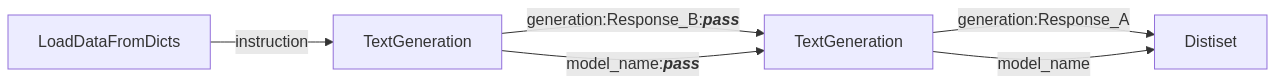

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 0>:15                                                                             │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │        base_dataset = Dataset({                                                              │ │
│ │                       │   features: ['instruction', 'Response_A', 'Response_B', 'chosen'],   │ │
│ │                       │   num_rows: 25                                                       │ │
│ │                       })                                                                     │ │
│ │            base_url = 'https://api-inference.huggingface.co/models'                          │ │
│ │       basic_dataset = 'uplimit-synthetic-data-week-2-basic-version-v1'                       │ │
│ │              client = <openai.OpenAI object at 0x7ec5a807ab50>                               │ │
│ │                data = LoadDataFromDicts(                                                     │ │
│ │                       │   exclude_from_signature={                                           │ │
│ │                       │   │   'llm_jobs_ids',                                                │ │
│ │                       │   │   'gpu_memory_utilization',                                      │ │
│ │                       │   │   'disable_cuda_device_placement',                               │ │
│ │                       │   │   'exclude_from_signature',                                      │ │
│ │                       │   │   'resources',                                                   │ │
│ │                       │   │   'llm_offline_batch_generation_block_until_done',               │ │
│ │                       │   │   'input_batch_size',                                            │ │
│ │                       │   │   'type_info'                                                    │ │
│ │                       │   },                                                                 │ │
│ │                       │   name='load_data_from_dicts_0',                                     │ │
│ │                       │   resources=StepResources(                                           │ │
│ │                       │   │   replicas=1,                                                    │ │
│ │                       │   │   cpus=None,                                                     │ │
│ │                       │   │   gpus=None,                                                     │ │
│ │                       │   │   memory=None,                                                   │ │
│ │                       │   │   resources=None                                                 │ │
│ │                       │   ),                                                                 │ │
│ │                       │   input_mappings={},                                                 │ │
│ │                       │   output_mappings={},                                                │ │
│ │                       │   use_cache=True,                                                    │ │
│ │                       │   batch_size=50,                                                     │ │
│ │                       │   data=[                                                             │ │
│ │                       │   │   {                                                              │ │
│ │                       │   │   │   'instruction': 'What is the difference between supervised  │ │
│ │                       learning and unsupervised learning?'                                   │ │
│ │                       │   │   },                                                             │ │
│ │                       │   │   {                                                              │ │
│ │                       │   │   │   'instruction': 'Explain

In [18]:
import openai

# Initialize client with API key
client = openai.OpenAI(api_key=open_ai_key)

# Define model and inputs
model = "gpt-3.5-turbo-0125"
messages = [
    {"role": "user", "content": "Given the prompt: 'What is the capital of France?', compare the following responses."},
    {"role": "assistant", "content": "Response A: Paris is the capital of France."},
    {"role": "assistant", "content": "Response B: The capital of France is Paris."}
]

# Call OpenAI API with correct arguments
response = client.chat.completions.create(
    model=model,
    messages=messages,
    max_tokens=200,
    temperature=0.0
)

# Print response correctly
print(response.choices[0].message.content)


In [41]:
from distilabel.models.llms.huggingface import InferenceEndpointsLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import LoadDataFromDicts
from distilabel.steps.tasks import EvolQuality, TextGeneration

# Define input data
print(preference_data[:1])
# Define the Hugging Face Inference Endpoint
llm_a = InferenceEndpointsLLM(
                base_url=llama_url, #Llama-3.3-70B-Instruct

            )
llm_b = InferenceEndpointsLLM(
                base_url=mistral_url, #Mistral-7B-Instruct-v0.2
            )
evol_llm = InferenceEndpointsLLM(
    base_url="https://api-inference.huggingface.co/models/HuggingFaceH4/zephyr-7b-beta",
)


with Pipeline() as evol_pipeline:
    # Load data into the pipeline
    evol_data = LoadDataFromDicts(data=preference_data)

    # Generate feedback for Response A
    gen_a = TextGeneration(
        llm=llm_a,
        input_mappings={"instruction": "instruction"},
        output_mappings={"generation": "evaluation_A"},
    )

    # Generate feedback for Response B
    gen_b = TextGeneration(
        llm=llm_b,
        input_mappings={"instruction": "instruction"},
        output_mappings={"generation": "evaluation_B"},
    )

    # Apply evolution-based quality assessment to compare Response A
    quality_a = EvolQuality(
        llm=evol_llm,
        num_evolutions=1,
        input_mappings={"response": "evaluation_A"},
        output_mappings={"evolved_response": "final_eval_A"},
    )

    # Apply evolution-based quality assessment to compare Response B
    quality_b = EvolQuality(
        llm=evol_llm,
        num_evolutions=1,
        input_mappings={"response": "evaluation_B"},
        output_mappings={"evolved_response": "final_eval_B"},
    )


    # Connect pipeline steps
    evol_data >> gen_a >> quality_a
    evol_data >> gen_b >> quality_b


    # Run the pipeline
    evol_distiset = evol_pipeline.run()

# Print the final comparison result
print(evol_distiset)



[{'instruction': 'What is the difference between supervised learning and unsupervised learning?', 'Response_A': 'Supervised learning and unsupervised learning are two fundamental types of machine learning approaches. The main difference between them lies in the way the model learns from the data and the type of problem they are designed to solve.\n\n**Supervised Learning:**\n\nIn supervised learning, the model is trained on labeled data, which means the data is already classified or categorized. The goal is to learn a mapping between input data and the corresponding output labels, so the model can make predictions on new, unseen data. The model is "supervised" by the labeled data, which guides it to learn the correct relationships between the inputs and outputs.\n\nExample: Image', 'Response_B': ' Supervised learning and unsupervised learning are two types of machine learning techniques used for training models to make predictions or discover hidden patterns from data.\n\nIn supervised

[03/31/25 03:10:50] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to               ]8;id=263365;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=283566;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1015\1015]8;;\
                             '/root/.cache/distilabel/pipelines/pipeline_load_data_from_dicts_0_text_g             
                             eneration_0_text_generation_1_evol_quality_0_evol_quality_1/368dca180c781             
                             02b8e7401682dbe97525cdd1db6/executions/9e36c3838512faf2f06fcf13f9a70d90ed             
                             c2ce00/data/steps_outputs'                                                            

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in    ]8;id=380697;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=410255;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1046\1046]8;;\
                             stages:                                                                               
                              * Legend: 🚰 GeneratorStep 🌐 GlobalStep 🔄 Step                                     
                              * Stage 0:                                                                           
                                - 🚰 'load_data_from_dicts_0'                                                      
                                - 🔄 'text_generation_0'                                                           
                                - 🔄 'text_generation_1'                                                           
                                - 🔄 'evol_quality_0'                                                              
                                - 🔄 'evol_quality_1'                                                              

                    INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=783976;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=284510;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1382\1382]8;;\
                             load...                                                                               

[03/31/25 03:10:53] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 5/5                 ]8;id=278183;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=303592;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1418\1418]8;;\
                              * 'load_data_from_dicts_0' replicas: 1/1                                             
                              * 'text_generation_0' replicas: 1/1                                                  
                              * 'text_generation_1' replicas: 1/1                                                  
                              * 'evol_quality_0' replicas: 1/1                                                     
                              * 'evol_quality_1' replicas: 1/1                                                     

                    INFO     ['distilabel.pipeline'] ✅ All the steps from stage 0 have been loaded!   ]8;id=858784;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=540522;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1422\1422]8;;\

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 🚰 Starting yielding    ]8;id=430543;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=169278;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#179\179]8;;\
                             batches from generator step 'load_data_from_dicts_0'. Offset: 0                       

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 📨 Step                 ]8;id=245568;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=22437;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             'load_data_from_dicts_0' sending batch 0 to output queue                              

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 🏁 Finished running     ]8;id=100436;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=282365;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             step 'load_data_from_dicts_0' (replica ID: 0)                                         

                    INFO     ['distilabel.step.text_generation_0'] 📦 Processing batch 0 in     ]8;id=106729;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=868377;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

                    INFO     ['distilabel.step.text_generation_1'] 📦 Processing batch 0 in     ]8;id=816169;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=173349;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'text_generation_1' (replica ID: 0)                                                   

[03/31/25 03:10:58] INFO     ['distilabel.step.text_generation_1'] 📨 Step 'text_generation_1'  ]8;id=459631;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=353978;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_1'] 🏁 Finished running step     ]8;id=339610;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=674186;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_1' (replica ID: 0)                                                   

                    INFO     ['distilabel.step.evol_quality_1'] 📦 Processing batch 0 in        ]8;id=353599;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=255040;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'evol_quality_1' (replica ID: 0)                                                      

[03/31/25 03:11:01] INFO     ['distilabel.step.evol_quality_1'] 🔄 Ran iteration 0 evolving 25          ]8;id=162482;file:///usr/local/lib/python3.11/dist-packages/distilabel/steps/tasks/evol_quality/base.py\base.py]8;;\:]8;id=779812;file:///usr/local/lib/python3.11/dist-packages/distilabel/steps/tasks/evol_quality/base.py#253\253]8;;\
                             responses!                                                                            

                    INFO     ['distilabel.step.evol_quality_1'] 📨 Step 'evol_quality_1'        ]8;id=117290;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=951830;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.evol_quality_1'] 🏁 Finished running step        ]8;id=297280;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=847757;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'evol_quality_1' (replica ID: 0)                                                      

[03/31/25 03:11:03] INFO     ['distilabel.step.text_generation_0'] 📨 Step 'text_generation_0'  ]8;id=732582;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=526454;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_0'] 🏁 Finished running step     ]8;id=234203;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=447288;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

[03/31/25 03:11:04] INFO     ['distilabel.step.evol_quality_0'] 📦 Processing batch 0 in        ]8;id=786363;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=862183;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'evol_quality_0' (replica ID: 0)                                                      

[03/31/25 03:11:07] INFO     ['distilabel.step.evol_quality_0'] 🔄 Ran iteration 0 evolving 25          ]8;id=138131;file:///usr/local/lib/python3.11/dist-packages/distilabel/steps/tasks/evol_quality/base.py\base.py]8;;\:]8;id=747317;file:///usr/local/lib/python3.11/dist-packages/distilabel/steps/tasks/evol_quality/base.py#253\253]8;;\
                             responses!                                                                            

                    INFO     ['distilabel.step.evol_quality_0'] 📨 Step 'evol_quality_0'        ]8;id=396920;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=624849;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.evol_quality_0'] 🏁 Finished running step        ]8;id=494992;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=778992;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'evol_quality_0' (replica ID: 0)                                                      

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Distiset({
    evol_quality_1: DatasetDict({
        train: Dataset({
            features: ['instruction', 'Response_A', 'Response_B', 'chosen', 'evaluation_B', 'distilabel_metadata', 'model_name', 'final_eval_B'],
            num_rows: 25
        })
    })
    evol_quality_0: DatasetDict({
        train: Dataset({
            features: ['instruction', 'Response_A', 'Response_B', 'chosen', 'evaluation_A', 'distilabel_metadata', 'model_name', 'final_eval_A'],
            num_rows: 25
        })
    })
})


In [43]:
evol_distiset

Distiset({
    evol_quality_1: DatasetDict({
        train: Dataset({
            features: ['instruction', 'Response_A', 'Response_B', 'chosen', 'evaluation_B', 'distilabel_metadata', 'model_name', 'final_eval_B'],
            num_rows: 25
        })
    })
    evol_quality_0: DatasetDict({
        train: Dataset({
            features: ['instruction', 'Response_A', 'Response_B', 'chosen', 'evaluation_A', 'distilabel_metadata', 'model_name', 'final_eval_A'],
            num_rows: 25
        })
    })
})

In [60]:
lst = list(zip(evol_distiset["evol_quality_1"]["train"],evol_distiset["evol_quality_0"]["train"]))

print(len(lst))


25


In [65]:
evol_preference_data = []
for item in evol_distiset["evol_quality_1"]["train"]:
    evol_preference_data.append({
                "instruction": item["instruction"],
                "Response_A": item["Response_A"],
                "Response_B": item["Response_B"],
                "evaluation_A": item.get("evaluation_A",None),
                "evaluation_B": item.get("evaluation_B",None),
                "final_eval_A": item.get("final_eval_A",None),
                "final_eval_B": item.get("final_eval_B",None),
          })
for item in evol_distiset["evol_quality_0"]["train"]:
    evol_preference_data.append({
                "instruction": item["instruction"],
                "Response_A": item["Response_A"],
                "Response_B": item["Response_B"],
                "evaluation_A": item.get("evaluation_A",None),
                "evaluation_B": item.get("evaluation_B",None),
                "final_eval_A": item.get("final_eval_A",None),
                "final_eval_B": item.get("final_eval_B",None),
          })
print(evol_preference_data)




[{'instruction': 'What is the difference between supervised learning and unsupervised learning?', 'Response_A': 'Supervised learning and unsupervised learning are two fundamental types of machine learning approaches. The main difference between them lies in the way the model learns from the data and the type of problem they are designed to solve.\n\n**Supervised Learning:**\n\nIn supervised learning, the model is trained on labeled data, which means the data is already classified or categorized. The goal is to learn a mapping between input data and the corresponding output labels, so the model can make predictions on new, unseen data. The model is "supervised" by the labeled data, which guides it to learn the correct relationships between the inputs and outputs.\n\nExample: Image', 'Response_B': ' Supervised learning and unsupervised learning are two types of machine learning techniques used for training models to make predictions or discover hidden patterns from data.\n\nIn supervised

In [66]:
print(evol_preference_data[0]['evaluation_B'])
len(evol_preference_data)

 Supervised learning and unsupervised learning are two main categories of machine learning, a subset of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. 

In supervised learning, the model is trained on a labeled dataset. Labeled means that the data used for training comes with an already known output or target value. The model learns to map inputs to outputs based on the examples it is given. For instance, a spam filter is a supervised learning model; it's trained on email messages that are already labeled as 'spam' or 'not


50

In [67]:
username = "bhuvana-ak7"
evol_dataset = Dataset.from_list(evol_preference_data)
evol_dataset.push_to_hub(
        f"{username}/uplimit-synthetic-data-week-2-evol-version-v1")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/515 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/bhuvana-ak7/uplimit-synthetic-data-week-2-evol-version-v1/commit/26308d07aa6823425c7ef016f40456f696b5fc05', commit_message='Upload dataset', commit_description='', oid='26308d07aa6823425c7ef016f40456f696b5fc05', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/bhuvana-ak7/uplimit-synthetic-data-week-2-evol-version-v1', endpoint='https://huggingface.co', repo_type='dataset', repo_id='bhuvana-ak7/uplimit-synthetic-data-week-2-evol-version-v1'), pr_revision=None, pr_num=None)

In [9]:
# from distilabel.models.llms.huggingface import InferenceEndpointsLLM
# from distilabel.pipeline import Pipeline
# from distilabel.steps import LoadDataFromDicts
# from distilabel.steps.tasks import EvolQuality, TextGeneration

# with Pipeline() as pipeline:
#     llm = InferenceEndpointsLLM(
#         base_url="https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-3B-Instruct",
#     )
#     data = LoadDataFromDicts(
#         data=[{"instruction": "Generate a short question about Machine Learning."}]
#     )
#     gen_a = TextGeneration(
#         llm=llm,
#         output_mappings={"generation": "rejected"},
#     )
#     gen_b = EvolQuality(
#         llm=llm,
#         num_evolutions=1,
#         input_mappings={"response": "rejected"},
#         output_mappings={"evolved_response": "chosen"},
#     )
#     data >> gen_a >> gen_b

# if __name__ == "__main__":
#     username = "bhuvana-ak7"
#     distiset = pipeline.run(use_cache=False)
#     distiset.push_to_hub(
#         f"{username}/uplimit-synthetic-data-week-2-with-evol",
#         include_script=True,
#     )

[03/30/25 18:01:42] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to               ]8;id=313280;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=819847;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1015\1015]8;;\
                             '/root/.cache/distilabel/pipelines/pipeline_load_data_from_dicts_0_text_g             
                             eneration_0_evol_quality_0/c5ed2d579dffacc6f15a8b01de27b4e78e7943c0/execu             
                             tions/e6e7dac0b6097d2a8431480814bf16f00043ac9b/data/steps_outputs'                    

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in    ]8;id=147846;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=859146;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1046\1046]8;;\
                             stages:                                                                               
                              * Legend: 🚰 GeneratorStep 🌐 GlobalStep 🔄 Step                                     
                              * Stage 0:                                                                           
                                - 🚰 'load_data_from_dicts_0'                                                      
                                - 🔄 'text_generation_0'                                                           
                                - 🔄 'evol_quality_0'                                                              

                    INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=54971;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=740071;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1382\1382]8;;\
                             load...                                                                               

[03/30/25 18:01:45] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 3/3                 ]8;id=535201;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=923325;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1418\1418]8;;\
                              * 'load_data_from_dicts_0' replicas: 1/1                                             
                              * 'text_generation_0' replicas: 1/1                                                  
                              * 'evol_quality_0' replicas: 1/1                                                     

                    INFO     ['distilabel.pipeline'] ✅ All the steps from stage 0 have been loaded!   ]8;id=492404;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=971274;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1422\1422]8;;\

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 🚰 Starting yielding    ]8;id=904818;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=642806;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#179\179]8;;\
                             batches from generator step 'load_data_from_dicts_0'. Offset: 0                       

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 📨 Step                 ]8;id=394398;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=586171;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             'load_data_from_dicts_0' sending batch 0 to output queue                              

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 🏁 Finished running     ]8;id=983806;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=80339;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             step 'load_data_from_dicts_0' (replica ID: 0)                                         

                    INFO     ['distilabel.step.text_generation_0'] 📦 Processing batch 0 in     ]8;id=724126;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=152261;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

[03/30/25 18:01:46] INFO     ['distilabel.step.text_generation_0'] 📨 Step 'text_generation_0'  ]8;id=313814;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=962008;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_0'] 🏁 Finished running step     ]8;id=600686;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=799956;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

                    INFO     ['distilabel.step.evol_quality_0'] 📦 Processing batch 0 in        ]8;id=422062;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=263676;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'evol_quality_0' (replica ID: 0)                                                      

[03/30/25 18:01:47] INFO     ['distilabel.step.evol_quality_0'] 🔄 Ran iteration 0 evolving 1           ]8;id=321556;file:///usr/local/lib/python3.11/dist-packages/distilabel/steps/tasks/evol_quality/base.py\base.py]8;;\:]8;id=273603;file:///usr/local/lib/python3.11/dist-packages/distilabel/steps/tasks/evol_quality/base.py#253\253]8;;\
                             responses!                                                                            

                    INFO     ['distilabel.step.evol_quality_0'] 📨 Step 'evol_quality_0'        ]8;id=961728;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=879383;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.evol_quality_0'] 🏁 Finished running step        ]8;id=490901;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=768176;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'evol_quality_0' (replica ID: 0)                                                      

Generating train split: 0 examples [00:00, ? examples/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/3.79k [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.
--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.11/logging/handlers.py", line 1492, in emit
    self.enqueue(self.prepare(record))
  File "/usr/lib/python3.11/logging/handlers.py", line 1450, in enqueue
    self.queue.put_nowait(record)
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 138, in put_nowait
    return self.put(obj, False)
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 88, in put
    raise ValueError(f"Queue {self!r} is closed")
ValueError: Queue <multiprocessing.queues.Queue object at 0x7ecb4e9f1dd0> is closed
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/

README.md:   0%|          | 0.00/3.79k [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.
--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.11/logging/handlers.py", line 1492, in emit
    self.enqueue(self.prepare(record))
  File "/usr/lib/python3.11/logging/handlers.py", line 1450, in enqueue
    self.queue.put_nowait(record)
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 138, in put_nowait
    return self.put(obj, False)
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 88, in put
    raise ValueError(f"Queue {self!r} is closed")
ValueError: Queue <multiprocessing.queues.Queue object at 0x7ecb4e9f1dd0> is closed
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/

### With critiques

We can now also add generation for using differen models and then evaluate them using an LLM as a judge. Good judges can be found in [allenai/reward-bench](https://huggingface.co/spaces/allenai/reward-bench) or the [AtlaAI/judge-arena](https://huggingface.co/spaces/AtlaAI/judge-arena).

25


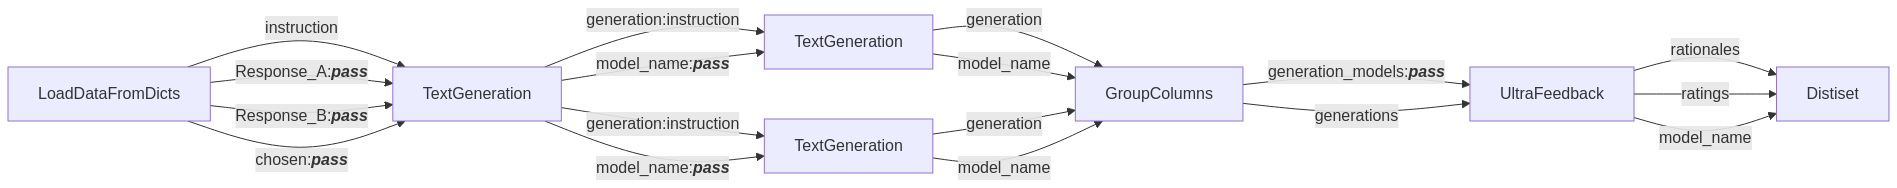

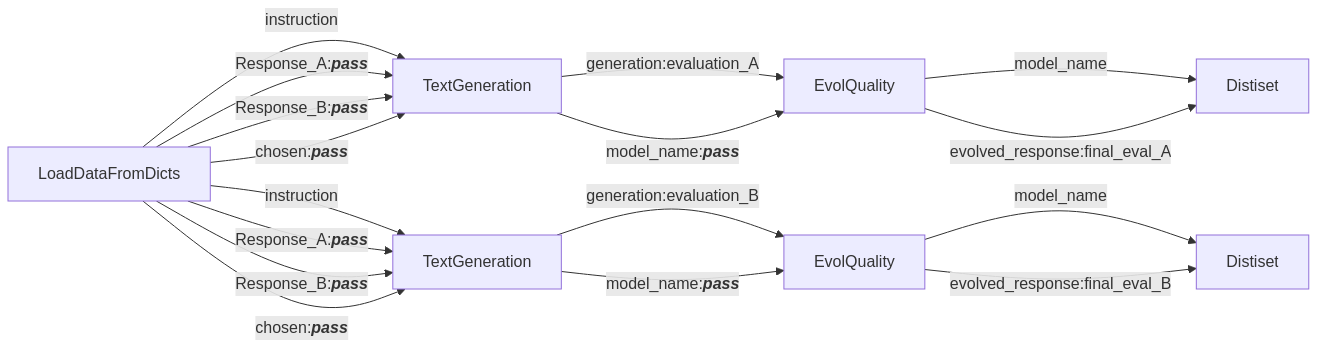

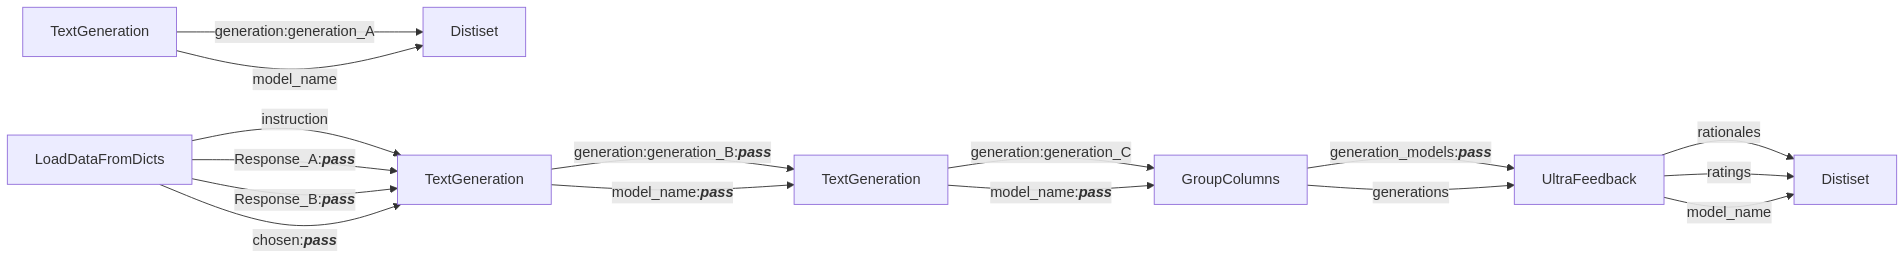

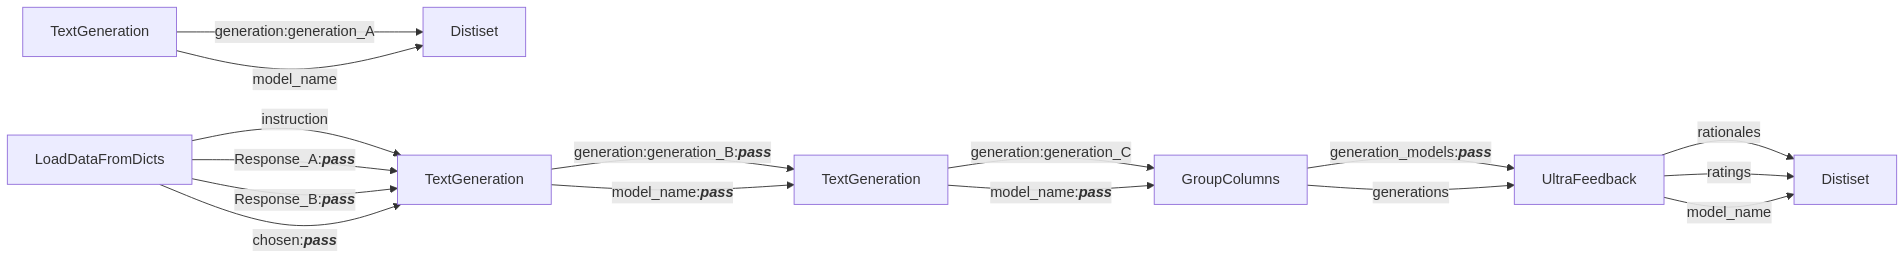

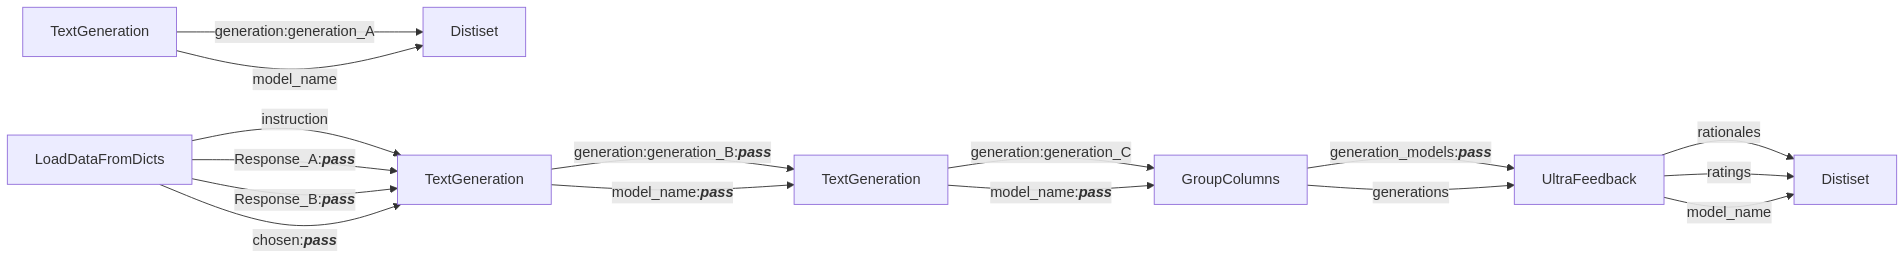

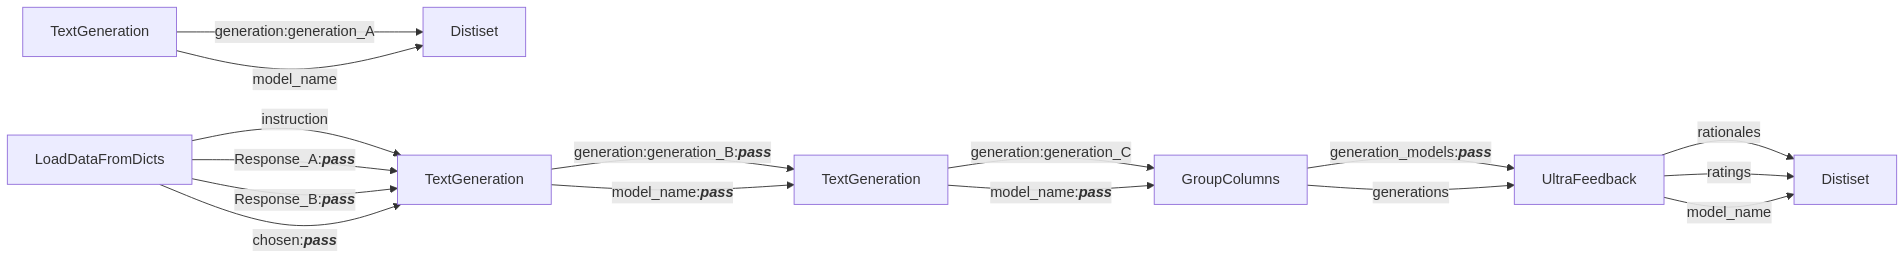

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 0>:60                                                                             │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │           base_dataset = Dataset({                                                           │ │
│ │                          │   features: ['instruction', 'Response_A', 'Response_B',           │ │
│ │                          'chosen'],                                                          │ │
│ │                          │   num_rows: 25                                                    │ │
│ │                          })                                                                  │ │
│ │               base_url = 'https://api-inference.huggingface.co/models'                       │ │
│ │          basic_dataset = 'uplimit-synthetic-data-week-2-basic-version-v1'                    │ │
│ │                 client = <openai.OpenAI object at 0x7ec5a80a5390>                            │ │
│ │            critic_data = LoadDataFromDicts(                                                  │ │
│ │                          │   exclude_from_signature={                                        │ │
│ │                          │   │   'llm_jobs_ids',                                             │ │
│ │                          │   │   'gpu_memory_utilization',                                   │ │
│ │                          │   │   'disable_cuda_device_placement',                            │ │
│ │                          │   │   'exclude_from_signature',                                   │ │
│ │                          │   │   'resources',                                                │ │
│ │                          │   │   'llm_offline_batch_generation_block_until_done',            │ │
│ │                          │   │   'input_batch_size',                                         │ │
│ │                          │   │   'type_info'                                                 │ │
│ │                          │   },                                                              │ │
│ │                          │   name='load_data_from_dicts_0',                                  │ │
│ │                          │   resources=StepResources(                                        │ │
│ │                          │   │   replicas=1,                                                 │ │
│ │                          │   │   cpus=None,                                                  │ │
│ │                          │   │   gpus=None,                                                  │ │
│ │                          │   │   memory=None,                                                │ │
│ │                          │   │   resources=None                                              │ │
│ │                          │   ),                                                              │ │
│ │                          │   input_mappings={},                                              │ │
│ │                          │   output_mappings={},                                             │ │
│ │                          │   use_cache=True,                                                 │ │
│ │                          │   batch_size=50,                                                  │ │
│ │                          │   data=[                                                          │ │
│ │                          │   │   {                                                           │ │
│ │                          │   │   │   'instruction': 'What is the difference between          │ │
│ │                          supervised learning and unsupervised learning?',                    │ │
│ │                          │   │   │   'Response_A': 'Supervised learning and unsupervised     │ │
│ │                          learning are two fundamental typ

In [129]:
from distilabel.models.llms.huggingface import InferenceEndpointsLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import GroupColumns, LoadDataFromDicts
from distilabel.steps.tasks import TextGeneration, UltraFeedback

# Print the length of the data to ensure 25 rows are loaded
print(len(preference_data))

with Pipeline() as critic_pipeline:
    # Load data
    critic_data = LoadDataFromDicts(data=preference_data)

    # Define LLMs for generation
    llm_gen_a = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-3B-Instruct"
    )
    llm_gen_b = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/Qwen/Qwen2.5-1.5B-Instruct"
    )

    # Text generation steps for models A, B, and C
    gen_a = TextGeneration(
        llm=llm_gen_a,
        input_mappings={"instruction": "Generate a variant of 'instruction' "},
        output_mappings={"generation": "generation_A"}
    )
    gen_b = TextGeneration(
        llm=llm_gen_a,
        input_mappings={"instruction": "instruction"},
        output_mappings={"generation": "generation_B"}
    )
    gen_c = TextGeneration(
        llm=llm_gen_b,
        input_mappings={"instruction": "instruction"},
        output_mappings={"generation": "generation_C"}
    )

    # Group columns to combine outputs
    group_columns = GroupColumns(
        name="combine_columns",
        columns=["generation_A", "generation_B", "generation_C"],
        output_columns=["generations", "generation_models"],
        input_batch_size=3,  # Ensure all outputs are batched together
    )

    # Define the judge model for feedback
    llm_judge = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/mistralai/Mistral-7B-Instruct-v0.3"
    )

    judge = UltraFeedback(
        llm=llm_judge,
        aspect="overall-rating",
    )

    # Pipeline flow
    critic_data >> gen_b >> gen_c >> group_columns >> judge

    # Run the pipeline
    critic_distiset = critic_pipeline.run()

# Print the resulting dataset to check
print(len(critic_distiset))  # This should print 25 if the data was processed correctly


In [125]:
from distilabel.models.llms.huggingface import InferenceEndpointsLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import GroupColumns, LoadDataFromDicts
from distilabel.steps.tasks import TextGeneration, UltraFeedback

print(len(preference_data))
with Pipeline() as critic_pipeline:
    critic_data = LoadDataFromDicts(data=preference_data)
    print(f"critic_data",critic_data)
    llm_gen_a = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-3B-Instruct"
    )
    llm_gen_b = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/Qwen/Qwen2.5-1.5B-Instruct"
    )
    gen_a = TextGeneration(llm=llm_gen_a, output_mappings={"generation": "instruction"})
    gen_b = TextGeneration(llm=llm_gen_a)
    gen_c = TextGeneration(llm=llm_gen_b)
    llm_judge = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/mistralai/Mistral-7B-Instruct-v0.3"
    )
    group_columns = GroupColumns(
        name="combine_columns",
        columns=[
            "generation",
            "model_name",
        ],
        output_columns=[
            "generations",
            "generation_models",
        ],
        input_batch_size=2,
    )
    judge = UltraFeedback(
        llm=llm_judge,
        aspect="overall-rating",
    )
    critic_data >> gen_a >> [gen_b, gen_c] >> group_columns >> judge




25
critic_data exclude_from_signature={'llm_jobs_ids', 'gpu_memory_utilization', 'disable_cuda_device_placement', 'exclude_from_signature', 'resources', 'llm_offline_batch_generation_block_until_done', 'input_batch_size', 'type_info'} name='load_data_from_dicts_0' resources=StepResources(replicas=1, cpus=None, gpus=None, memory=None, resources=None) input_mappings={} output_mappings={} use_cache=True batch_size=50 data=[{'instruction': 'What is the difference between supervised learning and unsupervised learning?', 'Response_A': 'Supervised learning and unsupervised learning are two fundamental types of machine learning approaches. The main difference between them lies in the way the model learns from the data and the type of problem they are designed to solve.\n\n**Supervised Learning:**\n\nIn supervised learning, the model is trained on labeled data, which means the data is already classified or categorized. The goal is to learn a mapping between input data and the corresponding outp

In [126]:
# Run the pipeline
critic_distiset = critic_pipeline.run()

[03/31/25 04:32:52] INFO     ['distilabel.pipeline'] 💾 Loading `_BatchManager` from cache:             ]8;id=18005;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=304683;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#967\967]8;;\
                             '/root/.cache/distilabel/pipelines/pipeline_load_data_from_dicts_0_text_ge            
                             neration_0_text_generation_1_text_generation_2_combine_columns_ultra_feedb            
                             ack_0/9ccb80cf3e25d1852cd10318caef0d3f9cdf3fc5/executions/3fed65512ac84b7a            
                             5471f3ca8270e1e81705eb57/batch_manager.json'                                          

[03/31/25 04:32:53] INFO     ['distilabel.pipeline'] 💾 Loaded batch manager from cache doesn't contain ]8;id=936707;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=382614;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#394\394]8;;\
                             any remaining data. Returning `Distiset` from cache data...                           

In [127]:
critic_distiset

Distiset({
    default: DatasetDict({
        train: Dataset({
            features: ['instruction', 'Response_A', 'Response_B', 'chosen', 'generation_models', 'generations', 'distilabel_metadata', 'ratings', 'rationales', 'model_name'],
            num_rows: 1
        })
    })
})

In [120]:
critic_distiset["default"]["train"][0]

{'instruction': 'Supervised learning and unsupervised learning are two primary types of machine learning algorithms used for different types of tasks.\n\n**Supervised Learning:**\n\nIn supervised learning, the algorithm is trained on labeled data, where each example is associated with a known output or target variable. The algorithm learns to map inputs to outputs based on the labeled data. The goal is to predict the output variable for new, unseen inputs.\n\nExamples of supervised learning problems:\n\n1. Image classification (e.g., classifying an image as a cat, dog, or other object)\n2. Regression prediction (e.g., predicting house prices based on features like location and size',
 'Response_A': 'Supervised learning and unsupervised learning are two fundamental types of machine learning approaches. The main difference between them lies in the way the model learns from the data and the type of problem they are designed to solve.\n\n**Supervised Learning:**\n\nIn supervised learning, 

In [122]:
critic_preference_data = []
for item in critic_distiset["default"]["train"]:
    critic_preference_data.append({
                "instruction": item["instruction"],
                "Response_A": item["Response_A"],
                "Response_B": item["Response_B"],
                "chosen": item["chosen"],
                "generation_models": item.get("generation_models",None),
                "generations": item.get("generations",None),
                "ratings": item.get("ratings",None),
                "rationales": item.get("rationales",None),
          })





In [121]:
critic_preference_data

[{'instruction': 'Supervised learning and unsupervised learning are two primary types of machine learning algorithms used for different types of tasks.\n\n**Supervised Learning:**\n\nIn supervised learning, the algorithm is trained on labeled data, where each example is associated with a known output or target variable. The algorithm learns to map inputs to outputs based on the labeled data. The goal is to predict the output variable for new, unseen inputs.\n\nExamples of supervised learning problems:\n\n1. Image classification (e.g., classifying an image as a cat, dog, or other object)\n2. Regression prediction (e.g., predicting house prices based on features like location and size',
  'Response_A': 'Supervised learning and unsupervised learning are two fundamental types of machine learning approaches. The main difference between them lies in the way the model learns from the data and the type of problem they are designed to solve.\n\n**Supervised Learning:**\n\nIn supervised learning

In [88]:
if __name__ == "__main__":
    username = "bhuvana-ak7"
    #distiset = pipeline.run(use_cache=False)
    critic_dataset = Dataset.from_list(critic_preference_data)
    critic_dataset.push_to_hub(f"{username}/uplimit-synthetic-data-week-2-critique-version-v1")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

In [10]:
from distilabel.models.llms.huggingface import InferenceEndpointsLLM
from distilabel.pipeline import Pipeline
from distilabel.steps import GroupColumns, LoadDataFromDicts
from distilabel.steps.tasks import TextGeneration, UltraFeedback

with Pipeline() as pipeline:
    data = LoadDataFromDicts(
        data=[{"instruction": "Generate a short question about Machine Learning."}]
    )
    llm_gen_a = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-3B-Instruct"
    )
    llm_gen_b = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/Qwen/Qwen2.5-1.5B-Instruct"
    )
    gen_a = TextGeneration(llm=llm_gen_a, output_mappings={"generation": "instruction"})
    gen_b = TextGeneration(llm=llm_gen_a)
    gen_c = TextGeneration(llm=llm_gen_b)
    llm_judge = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/mistralai/Mistral-7B-Instruct-v0.3"
    )
    group_columns = GroupColumns(
        name="combine_columns",
        columns=[
            "generation",
            "model_name",
        ],
        output_columns=[
            "generations",
            "generation_models",
        ],
        input_batch_size=2,
    )
    judge = UltraFeedback(
        llm=llm_judge,
        aspect="overall-rating",
    )
    data >> gen_a >> [gen_b, gen_c] >> group_columns >> judge

if __name__ == "__main__":
    username = "bhuvana-ak7"
    distiset = pipeline.run(use_cache=False)
    distiset.push_to_hub(f"{username}/uplimit-synthetic-data-week-2-critique")

[03/30/25 18:02:27] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to               ]8;id=693234;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=247674;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1015\1015]8;;\
                             '/root/.cache/distilabel/pipelines/pipeline_load_data_from_dicts_0_text_g             
                             eneration_0_text_generation_1_text_generation_2_combine_columns_ultra_fee             
                             dback_0/9ccb80cf3e25d1852cd10318caef0d3f9cdf3fc5/executions/3fed65512ac84             
                             b7a5471f3ca8270e1e81705eb57/data/steps_outputs'                                       

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in    ]8;id=292989;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=449306;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1046\1046]8;;\
                             stages:                                                                               
                              * Legend: 🚰 GeneratorStep 🌐 GlobalStep 🔄 Step                                     
                              * Stage 0:                                                                           
                                - 🚰 'load_data_from_dicts_0'                                                      
                                - 🔄 'text_generation_0'                                                           
                                - 🔄 'text_generation_1'                                                           
                                - 🔄 'text_generation_2'                                                           
                                - 🔄 'combine_columns'                                                             
                                - 🔄 'ultra_feedback_0'                                                            

                    INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=31949;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=993992;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1382\1382]8;;\
                             load...                                                                               

[03/30/25 18:02:29] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 6/6                 ]8;id=61128;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=684233;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1418\1418]8;;\
                              * 'load_data_from_dicts_0' replicas: 1/1                                             
                              * 'text_generation_0' replicas: 1/1                                                  
                              * 'text_generation_1' replicas: 1/1                                                  
                              * 'text_generation_2' replicas: 1/1                                                  
                              * 'combine_columns' replicas: 1/1                                                    
                              * 'ultra_feedback_0' replicas: 1/1                                                   

                    INFO     ['distilabel.pipeline'] ✅ All the steps from stage 0 have been loaded!   ]8;id=879033;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=41921;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1422\1422]8;;\

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 🚰 Starting yielding    ]8;id=583216;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=966830;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#179\179]8;;\
                             batches from generator step 'load_data_from_dicts_0'. Offset: 0                       

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 📨 Step                 ]8;id=775334;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=248193;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             'load_data_from_dicts_0' sending batch 0 to output queue                              

                    INFO     ['distilabel.step.load_data_from_dicts_0'] 🏁 Finished running     ]8;id=701966;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=802914;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             step 'load_data_from_dicts_0' (replica ID: 0)                                         

                    INFO     ['distilabel.step.text_generation_0'] 📦 Processing batch 0 in     ]8;id=948382;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=112561;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

[03/30/25 18:02:30] INFO     ['distilabel.step.text_generation_0'] 📨 Step 'text_generation_0'  ]8;id=836743;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=403902;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_0'] 🏁 Finished running step     ]8;id=114057;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=283304;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_0' (replica ID: 0)                                                   

                    INFO     ['distilabel.step.text_generation_1'] 📦 Processing batch 0 in     ]8;id=570646;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=44199;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'text_generation_1' (replica ID: 0)                                                   

                    INFO     ['distilabel.step.text_generation_2'] 📦 Processing batch 0 in     ]8;id=375415;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=486499;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'text_generation_2' (replica ID: 0)                                                   

[03/30/25 18:02:31] WARNING  ['distilabel.llm.https://api-inference.huggingface.co/model ]8;id=605621;file:///usr/local/lib/python3.11/dist-packages/distilabel/models/llms/huggingface/inference_endpoints.py\inference_endpoints.py]8;;\:]8;id=101245;file:///usr/local/lib/python3.11/dist-packages/distilabel/models/llms/huggingface/inference_endpoints.py#398\398]8;;\
                             s/Qwen/Qwen2.5-1.5B-Instruct'] ⚠️ Received no response using                           
                             Inference Client (model:                                                              
                             'https://api-inference.huggingface.co/models/Qwen/Qwen2.5-1                           
                             .5B-Instruct'). Finish reason was: 503, message='Service                              
                             Temporarily Unavailable',                                                             
                             url='https://api-inference.huggingface.co/models/Qwen/Qwen2                           
                             .5-1.5B-Instruct/v1/chat/completions'                                                 

                    INFO     ['distilabel.step.text_generation_2'] 📨 Step 'text_generation_2'  ]8;id=109471;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=933075;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_2'] 🏁 Finished running step     ]8;id=843935;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=325375;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_2' (replica ID: 0)                                                   

[03/30/25 18:02:32] INFO     ['distilabel.step.text_generation_1'] 📨 Step 'text_generation_1'  ]8;id=371881;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=320465;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.text_generation_1'] 🏁 Finished running step     ]8;id=558214;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=934112;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'text_generation_1' (replica ID: 0)                                                   

                    INFO     ['distilabel.step.combine_columns'] 📦 Processing batch 0 in       ]8;id=656360;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=829770;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'combine_columns' (replica ID: 0)                                                     

                    INFO     ['distilabel.step.combine_columns'] 📨 Step 'combine_columns'      ]8;id=500887;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=731016;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.combine_columns'] 🏁 Finished running step       ]8;id=703590;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=960404;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'combine_columns' (replica ID: 0)                                                     

[03/30/25 18:02:33] INFO     ['distilabel.step.ultra_feedback_0'] 📦 Processing batch 0 in      ]8;id=768689;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=991123;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#230\230]8;;\
                             'ultra_feedback_0' (replica ID: 0)                                                    

[03/30/25 18:02:35] INFO     ['distilabel.step.ultra_feedback_0'] 📨 Step 'ultra_feedback_0'    ]8;id=38718;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=634844;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#290\290]8;;\
                             sending batch 0 to output queue                                                       

                    INFO     ['distilabel.step.ultra_feedback_0'] 🏁 Finished running step      ]8;id=118815;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py\step_wrapper.py]8;;\:]8;id=41665;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/step_wrapper.py#129\129]8;;\
                             'ultra_feedback_0' (replica ID: 0)                                                    

Generating train split: 0 examples [00:00, ? examples/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/870 [00:00<?, ?B/s]

### With multi-turn

[03/30/25 18:18:43] INFO     ['distilabel.pipeline'] 📝 Pipeline data will be written to               ]8;id=436873;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=147885;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1015\1015]8;;\
                             '/root/.cache/distilabel/pipelines/pipeline_magpie_generator_0_chat_gener             
                             ation_0_chat_generation_1/a1cc08f0492623b11481cc1e55ab931aebe79acf/execut             
                             ions/326deb7b5156233f082f3089ddfa8fa21f4a370b/data/steps_outputs'                     

                    INFO     ['distilabel.pipeline'] ⌛ The steps of the pipeline will be loaded in    ]8;id=788799;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=787367;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1046\1046]8;;\
                             stages:                                                                               
                              * Legend: 🚰 GeneratorStep 🌐 GlobalStep 🔄 Step                                     
                              * Stage 0:                                                                           
                                - 🚰 'magpie_generator_0'                                                          
                                - 🔄 'chat_generation_0'                                                           
                                - 🔄 'chat_generation_1'                                                           

                    INFO     ['distilabel.pipeline'] ⏳ Waiting for all the steps of stage 0 to        ]8;id=618431;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=872299;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1382\1382]8;;\
                             load...                                                                               

[03/30/25 18:18:46] INFO     ['distilabel.pipeline'] ⏳ Steps from stage 0 loaded: 2/3                 ]8;id=574308;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=748724;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1418\1418]8;;\
                              * 'magpie_generator_0' replicas: 0/1                                                 
                              * 'chat_generation_0' replicas: 1/1                                                  
                              * 'chat_generation_1' replicas: 1/1                                                  

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

[03/30/25 18:18:56] ERROR    ['distilabel.pipeline'] ❌ Failed to load step 'magpie_generator_0': Step ]8;id=591682;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/local.py\local.py]8;;\:]8;id=888920;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/local.py#316\316]8;;\
                             load failed: You are trying to access a gated repo.                                   
                             Make sure to have access to it at                                                     
                             https://huggingface.co/meta-llama/Llama-3.3-70B-Instruct.                             
                             403 Client Error. (Request ID:                                                        
                             Root=1-67e98b10-66d13b92036cd0e40115819e;a0d14d15-b256-4c62-9ba0-ca336ab6             
                             b13c)                                                                                 
                                                                                                                   
                             Cannot access gated repo for url                                                      
                             https://huggingface.co/meta-llama/Llama-3.3-70B-Instruct/resolve/main/con             
                             fig.json.                                                                             
                             Access to model meta-llama/Llama-3.3-70B-Instruct is restricted and you               
                             are not in the authorized list. Visit                                                 
                             https://huggingface.co/meta-llama/Llama-3.3-70B-Instruct to ask for                   
                             access.                                                                               
                                                                                                                   
                             For further information visit                                                         
                             'https://distilabel.argilla.io/latest/api/pipeline/step_wrapper'                      

                    ERROR    ['distilabel.pipeline'] ❌ Failed to load all the steps of stage 0        ]8;id=382106;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py\base.py]8;;\:]8;id=368153;file:///usr/local/lib/python3.11/dist-packages/distilabel/pipeline/base.py#1396\1396]8;;\

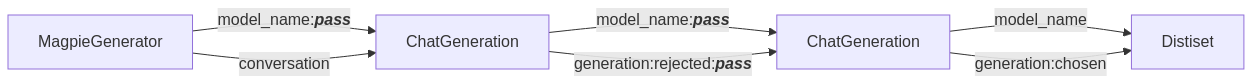

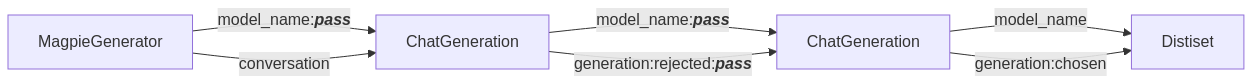

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_http.py:409 in                    │
│ hf_raise_for_status                                                                              │
│                                                                                                  │
│   406 │   </Tip>                                                                                 │
│   407 │   """                                                                                    │
│   408 │   try:                                                                                   │
│ ❱ 409 │   │   response.raise_for_status()                                                        │
│   410 │   except HTTPError as e:                                                                 │
│   411 │   │   error_code = response.headers.get("X-Error-Code")                                  │
│   412 │   │   error_message = response.headers.get("X-Error-Message")                            │
│                                                                                                  │
│ /usr/local/lib/python3.11/dist-packages/requests/models.py:1024 in raise_for_status              │
│                                                                                                  │
│   1021 │   │   │   )                                                                             │
│   1022 │   │                                                                                     │
│   1023 │   │   if http_error_msg:                                                                │
│ ❱ 1024 │   │   │   raise HTTPError(http_error_msg, response=self)                                │
│   1025 │                                                                                         │
│   1026 │   def close(self):                                                                      │
│   1027 │   │   """Releases the connection back to the pool. Once this method has been            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Llama-3.3-70B-Instruct.
403 Client Error. (Request ID: Root=1-67e98b10-66d13b92036cd0e40115819e;a0d14d15-b256-4c62-9ba0-ca336ab6b13c)

Cannot access gated repo for url https://huggingface.co/meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json.
Access to model meta-llama/Llama-3.3-70B-Instruct is restricted and you are not in the authorized list. Visit 
https://huggingface.co/meta-llama/Llama-3.3-70B-Instruct to ask for access.

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 0>:35                                                                             │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │          data = LoadDataFromDicts(                                                           │ │
│ │                 │   exclude_from_signature={                                                 │ │
│ │                 │   │   'gpu_memory_utilization',                                            │ │
│ │                 │   │   'llm_offline_batch_generation_block_until_done',                     │ │
│ │                 │   │   'disable_cuda_device_placement',                                     │ │
│ │                 │   │   'type_info',                                                         │ │
│ │                 │   │   'resources',                                                         │ │
│ │                 │   │   'llm_jobs_ids',                                                      │ │
│ │                 │   │   'exclude_from_

In [11]:
from distilabel.models.llms.huggingface import InferenceEndpointsLLM
from distilabel.pipeline import Pipeline
from distilabel.steps.tasks import ChatGeneration, MagpieGenerator

with Pipeline() as pipeline:
    llm_magpie = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/meta-llama/Llama-3.3-70B-Instruct",
        tokenizer_id="meta-llama/Llama-3.3-70B-Instruct",
        magpie_pre_query_template="llama3",
        use_magpie_template=True,
        generation_kwargs={"max_new_tokens": 2000},
    )
    llm_worse = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/meta-llama/Llama-3.2-3B-Instruct",
        generation_kwargs={"max_new_tokens": 2000},
    )
    llm_better = InferenceEndpointsLLM(
        base_url="https://api-inference.huggingface.co/models/meta-llama/Llama-3.3-70B-Instruct",
        generation_kwargs={"max_new_tokens": 2000},
    )
    gen_a = MagpieGenerator(llm=llm_magpie, end_with_user=True, num_rows=1, n_turns=2)
    gen_b = ChatGeneration(
        llm=llm_worse,
        input_mappings={"messages": "conversation"},
        output_mappings={"generation": "rejected"},
    )
    gen_c = ChatGeneration(
        llm=llm_better,
        input_mappings={"messages": "conversation"},
        output_mappings={"generation": "chosen"},
    )
    gen_a >> gen_b >> gen_c

if __name__ == "__main__":
    distiset = pipeline.run(use_cache=False)
    distiset.push_to_hub(
        "bhuvana-ak7/uplimit-synthetic-data-week-2-with-multi-turn",
        include_script=True,
    )

## 2. Explore and evaluate the generated data

We will nog show some basic data exploration on top of the [argilla/distilabel-intel-orca-dpo-pairs](https://huggingface.co/datasets/argilla/distilabel-intel-orca-dpo-pairs) dataset. This dataset had some original preference pairs and distilabel was used to provide new ratings and evaluate the correctness of the provided pairs.


In [12]:
from datasets import load_dataset

dataset = load_dataset("argilla/distilabel-intel-orca-dpo-pairs")
dataset

README.md:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/79.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/12859 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['system', 'input', 'chosen', 'rejected', 'generations', 'order', 'labelling_model', 'labelling_prompt', 'raw_labelling_response', 'rating', 'rationale', 'status', 'original_chosen', 'original_rejected', 'chosen_score', 'in_gsm8k_train'],
        num_rows: 12859
    })
})

We know, that there is a column that includes rating, which we can use as simple quality filters, so let's focus on all examples where the `chosen` rating is larger than 8.

In [13]:
dataset_quality = dataset.filter(
    lambda r:
        not r["chosen_score"] is None and
        r["chosen_score"] >= 8
)
dataset_quality

Filter:   0%|          | 0/12859 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['system', 'input', 'chosen', 'rejected', 'generations', 'order', 'labelling_model', 'labelling_prompt', 'raw_labelling_response', 'rating', 'rationale', 'status', 'original_chosen', 'original_rejected', 'chosen_score', 'in_gsm8k_train'],
        num_rows: 9499
    })
})

Similarly, we can focus on examples where the difference between chosen and rejected scores is large enough so the model can distinguish between them, while ensuring the difference is not too big.

In [14]:
dataset_quality_diff = dataset_quality.filter(
    lambda r:
        not r["rating"] is None and
        (max(r["rating"]) - min(r["rating"])) > 1 and
        (max(r["rating"]) - min(r["rating"])) < 4
)
dataset_quality_diff

Filter:   0%|          | 0/9499 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['system', 'input', 'chosen', 'rejected', 'generations', 'order', 'labelling_model', 'labelling_prompt', 'raw_labelling_response', 'rating', 'rationale', 'status', 'original_chosen', 'original_rejected', 'chosen_score', 'in_gsm8k_train'],
        num_rows: 1468
    })
})

Great, now we have a good starting subset based off our rating, we can continue to analyse the quality using some additional metrics. We will be using [`text-descriptives`](https://github.com/HLasse/TextDescriptives) to get some quality metrics for our texts. Specifically we will focus on the `flesch_reading_ease`, which indicates how easy a text is to read, where higher scores indicate easier reading.

In [15]:
import textdescriptives as td


def process_quality(batch):
    df = td.extract_metrics(
        text=batch["chosen"],
        lang="en",
        metrics=["readability"]
    )
    batch["flesch_reading_ease"] = df["flesch_reading_ease"].values
    return batch


dataset_quality_diff_reading = dataset_quality_diff.map(
    process_quality, batched=True
)

Map:   0%|          | 0/1468 [00:00<?, ? examples/s]

Next, we will also be adding some general domain classification using [gliclass](https://github.com/Knowledgator/GLiClass), which is an optimised zero-shot classification model. To further speed up this process, we will also be using a [ModernBERT architecture model](https://huggingface.co/knowledgator/gliclass-modern-large-v2.0-init) which is around 4x quicker on CPU.

In [16]:
from gliclass import GLiClassModel, ZeroShotClassificationPipeline
from transformers import AutoTokenizer

repo_id = "knowledgator/gliclass-modern-base-v2.0-init"
model = GLiClassModel.from_pretrained(repo_id)
tokenizer = AutoTokenizer.from_pretrained(repo_id)

pipeline = ZeroShotClassificationPipeline(
    model,
    tokenizer,
    device="cuda"
)

config.json:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/606M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.58M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

We then define out labels and run our batched inference. We do recommend using GPUs for running this part of the pipeline.

In [17]:
labels = [
    "business and industrial",
    "books and literature",
    "home and garden",
    "adult",
    "science",
    "food and drink",
    "real estate",
    "news",
    "jobs and education",
    "health",
    "hobbies and leisure",
    "games",
    "beauty and fitness",
    "computers and electronics",
    "arts and entertainment",
    "travel and transportation",
    "finance",
    "law and government",
    "sensitive subjects",
    "autos and vehicles",
    "people and society",
    "sports",
    "shopping",
    "online communities",
    "pets and animals",
    "internet and telecom",
]

def process_domains(batch):
    results = pipeline(batch["input"], labels, threshold=0)
    batch["domain"] = [max(res, key=lambda x: x['score'])["label"]
 if res else None for res in results]
    return batch

dataset_quality_diff_reading_domain = dataset_quality_diff_reading.map(
    process_domains, batched=True
)
dataset_quality_diff_reading_domain

Map:   0%|          | 0/1468 [00:00<?, ? examples/s]


100%|██████████| 125/125 [52:42<00:00, 25.30s/it]

100%|██████████| 59/59 [23:33<00:00, 23.96s/it]


DatasetDict({
    train: Dataset({
        features: ['system', 'input', 'chosen', 'rejected', 'generations', 'order', 'labelling_model', 'labelling_prompt', 'raw_labelling_response', 'rating', 'rationale', 'status', 'original_chosen', 'original_rejected', 'chosen_score', 'in_gsm8k_train', 'flesch_reading_ease', 'domain'],
        num_rows: 1468
    })
})

### 3. Publish the dataset on Hugging Face

Publish the dataset on the Hugging Face Hub. Make sure you update the ModelCard with all relevant information. Additionally, link the exploratory data analysis and preferably also add an analysis script.

In [ ]:
from datasets import Dataset

dataset_quality_diff_reading_domain.push_to_hub("uplimit/uplimit-synthetic-data-week-2-filtered")

Now, we can go to our dataset page and update the ModelCard with all relevant information. Additionally, we can add an analysis script. A good example for this is the original card attached to [argilla/distilabel-intel-orca-dpo-pairs](https://huggingface.co/datasets/argilla/distilabel-intel-orca-dpo-pairs).